# `causalml` Examples: Using Meta Learners

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings
import causalml
from causalml.inference.meta import LRSRegressor, XGBTRegressor, MLPTRegressor, BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

In [34]:
dir(causalml.inference.meta)

['BaseRClassifier',
 'BaseRLearner',
 'BaseRRegressor',
 'BaseSClassifier',
 'BaseSLearner',
 'BaseSRegressor',
 'BaseTClassifier',
 'BaseTLearner',
 'BaseTRegressor',
 'BaseXClassifier',
 'BaseXLearner',
 'BaseXRegressor',
 'LRSRegressor',
 'MLPTRegressor',
 'TMLELearner',
 'XGBRRegressor',
 'XGBTRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'explainer',
 'rlearner',
 'slearner',
 'tlearner',
 'tmle',
 'utils',
 'xlearner']

In [33]:
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

## Generate synthetic data

In [3]:
"""
X = np.random.uniform(size=n*p).reshape((n, -1))
b = np.sin(np.pi * X[:, 0] * X[:, 1]) + 2 * (X[:, 2] - 0.5) ** 2 + X[:, 3] + 0.5 * X[:, 4]
eta = 0.1
e = np.maximum(np.repeat(eta, n), np.minimum(np.sin(np.pi * X[:, 0] * X[:, 1]), np.repeat(1-eta, n)))
e = expit(logit(e) - adj)
tau = (X[:, 0] + X[:, 1]) / 2

w = np.random.binomial(1, e, size=n)
y = b + (w - 0.5) * tau + sigma * np.random.normal(size=n)
"""
y, X, treatment, tau, b, e = synthetic_data(mode=1, n=10000, p=8, sigma=1.0)

## S-Learner

### S-Learner using linear regression

In [73]:
learner_lr_s = BaseSRegressor(learner=LinearRegression())
ate_lr_s = learner_lr_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_lr_s)
cate_lr_s = learner_lr_s.predict(X=X, treatment=treatment)

[0.69206642]


### S-Learner using XGB

In [74]:
learner_xgb_s = BaseSRegressor(learner=XGBRegressor(silent=True))
ate_xgb_s = learner_xgb_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_xgb_s)
cate_xgb_s = learner_xgb_s.predict(X=X, treatment=treatment)

[0.57542622]


## T-Learner

### T-Learner using linear regression

In [75]:
learner_lr_t = BaseTRegressor(learner=LinearRegression())
ate_lr_t = learner_lr_t.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_lr_t)
cate_lr_s = learner_lr_s.predict(X=X, treatment=treatment)

(array([0.67581853]), array([0.63556948]), array([0.71606757]))


### T-Learner using XGB

In [93]:
learner_xgb_t = BaseTRegressor(learner=XGBRegressor(silent=True))
ate_xgb_t = learner_xgb_t.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_xgb_t)
cate_xgb_t = learner_xgb_s.predict(X=X, treatment=treatment)

(array([0.59516466]), array([0.55768422]), array([0.63264509]))


## X-Learner

### X-Learner using linear regression

In [77]:
learner_lr_x = BaseXRegressor(learner=LinearRegression())
ate_lr_x = learner_lr_x.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_lr_x)
cate_lr_x = learner_lr_x.predict(X=X, treatment=treatment)

(array([0.67581853]), array([0.63556948]), array([0.71606757]))


### X-Learner using XGB

In [78]:
learner_xgb_x = BaseXRegressor(learner=XGBRegressor(silent=True))
ate_xgb_x = learner_xgb_x.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_xgb_x)
cate_xgb_x = learner_xgb_x.predict(X=X, treatment=treatment)

(array([0.53686823]), array([0.49964425]), array([0.57409221]))


### X-Learner using linear regression with propensity score

In [80]:
learner_lr_x_p = BaseXRegressor(learner=LinearRegression())
ate_lr_x_p = learner_lr_x_p.estimate_ate(X=X, treatment=treatment, y=y, p=e)
print(ate_lr_x_p)
cate_lr_x_p = learner_lr_x_p.predict(X=X, treatment=treatment, p=e)

(array([0.67581853]), array([0.63556948]), array([0.71606757]))


### X-Learner using XGB with propensity score

In [81]:
learner_xgb_x_p = BaseXRegressor(learner=XGBRegressor(silent=True))
ate_xgb_x_p = learner_xgb_x_p.estimate_ate(X=X, treatment=treatment, y=y, p=e)
print(ate_xgb_x_p)
cate_xgb_x_p = learner_xgb_x_p.predict(X=X, treatment=treatment, p=e)

(array([0.53382476]), array([0.49659748]), array([0.57105204]))


## R-Learner

### R-Learner using linear regression

In [87]:
learner_lr_r = BaseRRegressor(learner=LinearRegression())
ate_lr_r = learner_lr_r.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_lr_r)
cate_lr_r = learner_lr_r.predict(X=X)

(array([0.58652266]), array([0.58611293]), array([0.58693238]))


### R-Learner using XGB

In [95]:
learner_xgb_r = BaseRRegressor(learner=XGBRegressor(silent=True))
ate_xgb_r = learner_xgb_r.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_xgb_r)
cate_xgb_r = learner_xgb_r.predict(X=X)

(array([0.48814099]), array([0.48773703]), array([0.48854495]))


### R-Learner using linear regression with propensity score

In [89]:
learner_lr_r_p = BaseRRegressor(learner=LinearRegression())
ate_lr_r_p = learner_lr_r_p.estimate_ate(X=X, treatment=treatment, y=y, p=e)
print(ate_lr_r_p)
cate_lr_r_p = learner_lr_r_p.predict(X=X)

(array([0.51279179]), array([0.51238221]), array([0.51320138]))


### R-Learner using XGB with propensity score

In [91]:
learner_xgb_r_p = BaseRRegressor(learner=XGBRegressor(silent=True))
ate_xgb_r_p = learner_xgb_r_p.estimate_ate(X=X, treatment=treatment, y=y, p=e)
print(ate_xgb_r_p)
cate_xgb_r_p = learner_xgb_r_p.predict(X=X)

(array([0.51604694]), array([0.51564354]), array([0.51645033]))


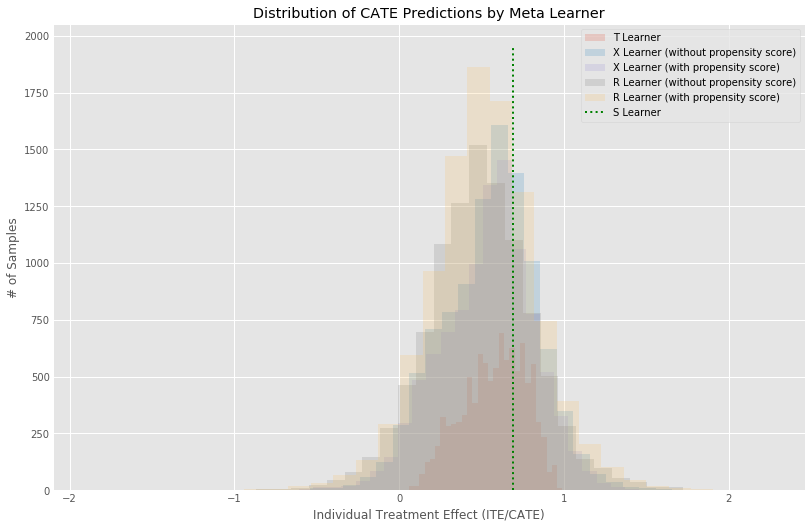

In [98]:
alpha = 0.2
bins = 30
plt.figure(figsize=(12,8))
plt.hist(cate_xgb_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_xgb_x, alpha=alpha, bins=bins, label='X Learner (without propensity score)')
plt.hist(cate_xgb_x_p, alpha=alpha, bins=bins, label='X Learner (with propensity score)')
plt.hist(cate_xgb_r, alpha=alpha, bins=bins, label='R Learner (without propensity score)')
plt.hist(cate_xgb_r_p, alpha=alpha, bins=bins, label='R Learner (with propensity score)')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner', linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_ = plt.legend()

## Validating meta-learner accuracy

In [100]:
train_summary, validation_summary = get_synthetic_summary_holdout(simulate_nuisance_and_easy_treatment,
                                                                  n=10000,
                                                                  valid_size=0.2,
                                                                  k=10)

[14:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:16:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [101]:
train_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.356272,0.073789,3.656923
S Learner (XGB),0.133847,0.023555,0.180866
T Learner (LR),0.341923,0.034404,0.306288
T Learner (XGB),0.149304,0.074582,0.325188
X Learner (LR),0.341923,0.034404,0.306288
X Learner (XGB),0.077322,0.031131,0.089164
R Learner (LR),0.286287,0.037714,0.325133
R Learner (XGB),0.068667,0.055135,0.082175


In [102]:
validation_summary

,Abs % Error of ATE,MSE,KL Divergence
Actuals,0.000000,0.000000,0.000000
S Learner (LR),0.368527,0.075299,3.864975
S Learner (XGB),0.137451,0.023622,0.205972
T Learner (LR),0.343347,0.034068,0.322218
T Learner (XGB),0.150052,0.071907,0.352131
X Learner (LR),0.343347,0.034068,0.322218
X Learner (XGB),0.084543,0.029424,0.113811
R Learner (LR),0.283852,0.036980,0.340140
R Learner (XGB),0.066154,0.050780,0.101898


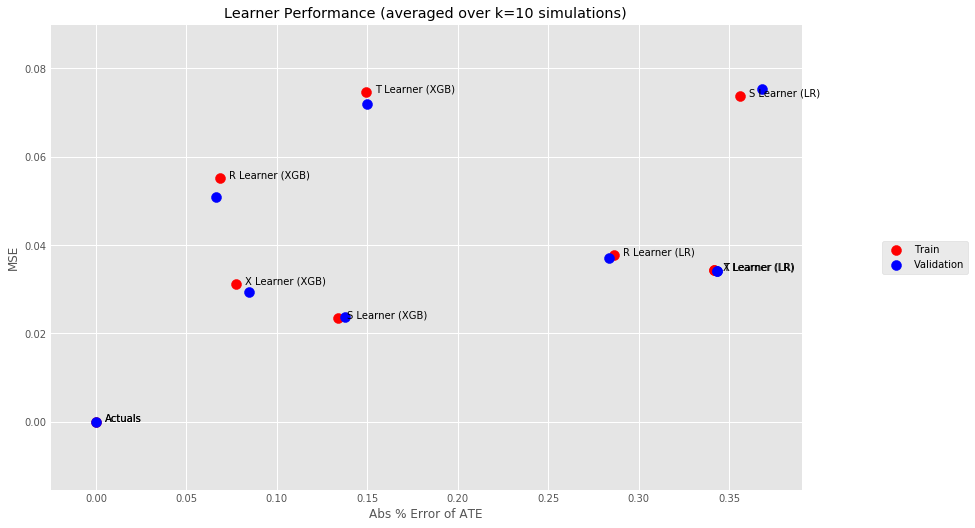

In [103]:
scatter_plot_summary_holdout(train_summary,
                             validation_summary,
                             k=10,
                             label=['Train', 'Validation'],
                             drop_learners=[],
                             drop_cols=[])

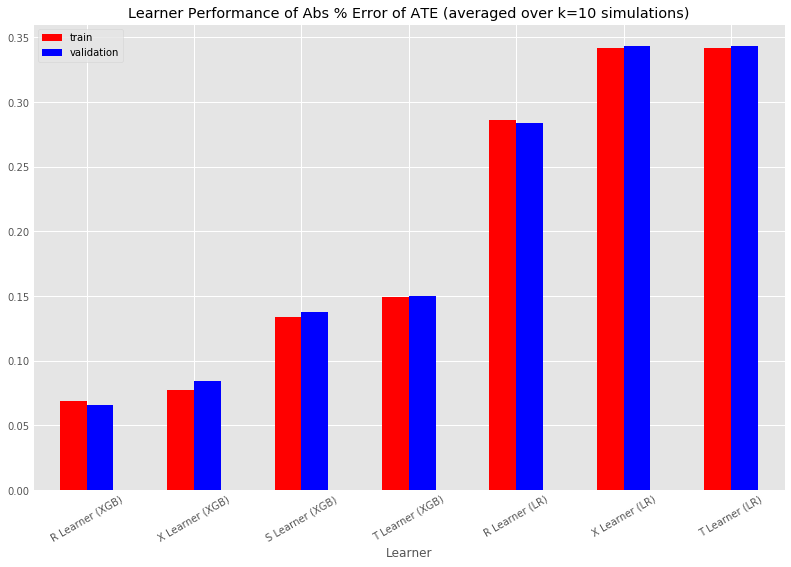

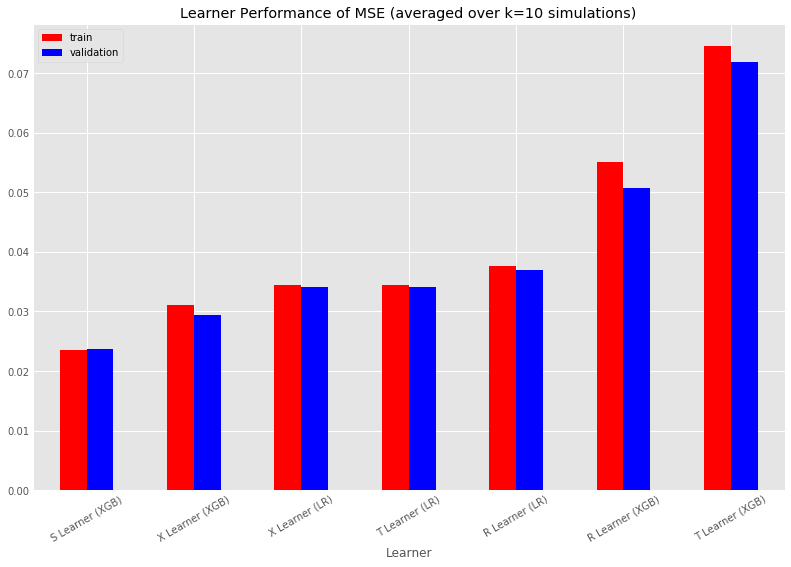

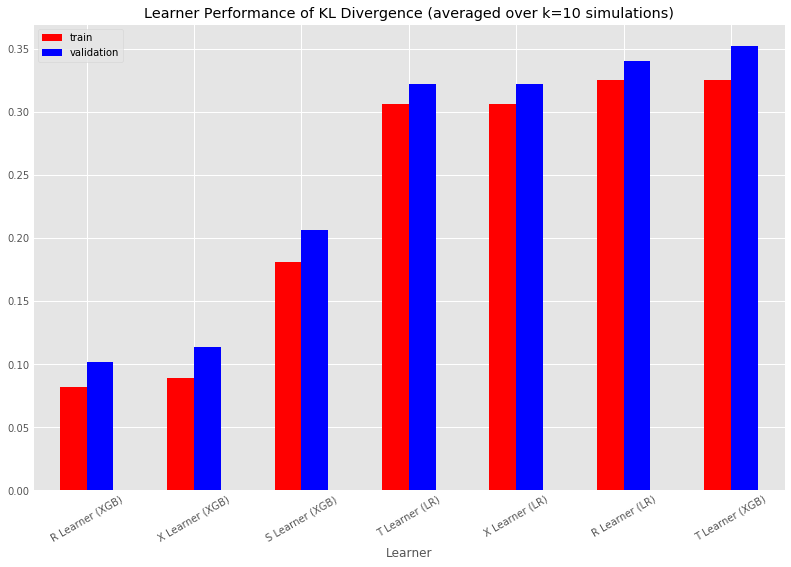

In [104]:
bar_plot_summary_holdout(train_summary,
                         validation_summary,
                         k=10,
                         drop_learners=['S Learner (LR)'],
                         drop_cols=[])